In [1]:
import qctoolkit as qtk
from matplotlib import pyplot as plt
import numpy as np
import re
from IPython.display import clear_output

%matplotlib inline

missing file: mov2asc
please modify /path/to/qctoolkit/setting.py and recompile.


In [7]:
# construct closed shell diatomic molecule dataset
A_list = ['H', 'Li', 'B', 'N', 'F']
B_list = ['Be', 'C', 'O']
molstr_list = []

# for a in qtk.flatten([A_list, B_list]):
#     molstr_string.append('%s2' % a)
    
for i in range(len(A_list)):
    for j in range(i, len(A_list)):
        a1, a2 = A_list[i], A_list[j]
        molstr_list.append('%s%s' % (a1, a2))
        
for i in range(len(B_list)):
    for j in range(i, len(B_list)):
        a1, a2 = B_list[i], B_list[j]
        molstr_list.append('%s%s' % (a1, a2))
        
for a1 in A_list:
    for a2 in B_list:
        molstr_list.append('%s%s+' % (a1, a2))
        molstr_list.append('%s%s-' % (a1, a2))
        #molstr_list.append('%s%s+' % (a1, a2))

print molstr_list

['HH', 'HLi', 'HB', 'HN', 'HF', 'LiLi', 'LiB', 'LiN', 'LiF', 'BB', 'BN', 'BF', 'NN', 'NF', 'FF', 'BeBe', 'BeC', 'BeO', 'CC', 'CO', 'OO', 'HBe+', 'HBe-', 'HC+', 'HC-', 'HO+', 'HO-', 'LiBe+', 'LiBe-', 'LiC+', 'LiC-', 'LiO+', 'LiO-', 'BBe+', 'BBe-', 'BC+', 'BC-', 'BO+', 'BO-', 'NBe+', 'NBe-', 'NC+', 'NC-', 'NO+', 'NO-', 'FBe+', 'FBe-', 'FC+', 'FC-', 'FO+', 'FO-']


In [3]:
# molstr_list = [
#     'HH',
#     'LiLi',
#     'BeBe',
#     'BB',
#     'CC',
#     'NN',
#     'OO',
#     'FF',
#     'HLi',
#     'HO-'
#     'HF',
#     'LiF',
#     'CO',
# ]
# print len(molstr_list)

In [2]:
molstr_list = [
    'HH',
    'HLi',
    'HHe+',
    'HBe+',
    'HeHe',
]

In [3]:
import horton as ht
#basis = ht.GOBasisFamily('basis', filename='basis/3-21g/H_Ne_uncontracted.nwchem')
basis = ht.GOBasisFamily('basis', filename='basis/sto6g/H_Ne.nwchem')

In [21]:
inp_grp = []
for molstr in molstr_list:
    if '+' in molstr:
        charge = 1
    elif '-' in molstr:
        charge = -1
    else:
        charge = 0
    alist = re.findall('[A-Z][a-z]*', molstr)
    Zs = [qtk.n2Z(a) for a in alist]
    inp_list = []
    inp_grp.append(inp_list)
    for R in np.arange(0.5, 3.01, 0.01):
        mol = qtk.Molecule()
        ZR = [[Zs[0], 0,0,0], [Zs[1], R, 0, 0]]
        mol.build(ZR)
        mol.charge = charge
        mol.name = mol.name + '_%s' % str(R)
        inp = qtk.QMInp(mol, program='horton', basis_set=basis, scf_step=30)
        try:
            inp.run()
            inp.delete_ht_types()
            inp.delete_matrices()
            inp_list.append(inp)
        except:
            pass
    print "%s finished" % mol.name
        
clear_output()

In [22]:
print [len(inps) for inps in inp_grp]
print sum([len(inps) for inps in inp_grp])
inp_grp_good = [inps for inps in inp_grp if len(inps) > 40]
print [len(inps) for inps in inp_grp_good]
print sum([len(inps) for inps in inp_grp_good])

[251, 251, 127, 128, 109, 251, 127, 109, 169, 172, 0, 80, 220, 108, 222, 250, 45, 71, 90, 52, 251, 165, 112, 132, 108, 190, 96, 251, 97, 251, 69, 69, 142, 80, 7, 44, 9, 37, 83, 111, 43, 0, 45, 35, 80, 136, 97, 69, 141, 58, 251]
6091
[251, 251, 127, 128, 109, 251, 127, 109, 169, 172, 80, 220, 108, 222, 250, 45, 71, 90, 52, 251, 165, 112, 132, 108, 190, 96, 251, 97, 251, 69, 69, 142, 80, 44, 83, 111, 43, 45, 80, 136, 97, 69, 141, 58, 251]
6003


H2_0.5
H1Li1_0.5
H1B1_0.5
H1N1_0.5
H1F1_0.5
Li2_0.5
Li1B1_0.5
Li1N1_0.5
Li1F1_0.5
B2_0.5
B1F1_0.5
N2_0.5
N1F1_0.5
F2_0.5
Be2_0.5
Be1C1_0.5
Be1O1_0.5
C2_0.5
C1O1_0.5
O2_0.5
H1Be1_0.5
H1Be1_0.5
H1C1_0.5
H1C1_0.5
H1O1_0.5
H1O1_0.5
Li1Be1_0.5
Li1Be1_0.5
Li1C1_0.5
Li1C1_0.5
Li1O1_0.5
Li1O1_0.5
Be1B1_0.5
Be1B1_0.5
B1C1_0.5
B1C1_0.5
B1O1_0.5
B1O1_0.5
Be1N1_0.5
Be1N1_0.5
C1N1_0.5
N1O1_0.5
N1O1_0.5
Be1F1_0.5
Be1F1_0.5
C1F1_0.5
C1F1_0.5
O1F1_0.5
O1F1_0.5


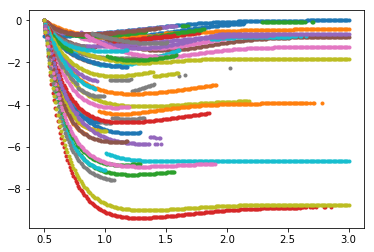

In [37]:
for inps in inp_grp:
    #inps = inp_grp[5]
    if len(inps) > 0:
        E = np.array([inp.Et for inp in inps])
        print inps[0].molecule.name
        try:
            E = E - (E[:-5]).max()
            plt.plot([inp.molecule.R[1,0] for inp in inps], E, ls='', marker='.')
        except:
            print E
        

In [38]:
qtk.save(inp_grp, 'A2_6003.pkl')

In [2]:
# construct H2 dataset of ~5000 bond lengths
inps = []
for R in np.arange(0.3, 3.1, 0.0005):
    mol = qtk.Molecule()
    mol.build([[1, 0, 0, 0], [1, R, 0, 0]])
    inp = qtk.QMInp(mol, program='horton', basis_set='3-21g')
    inp.run()
    D, U = np.linalg.eig(inp.olp)
    inp.X = U / np.sqrt(D)
    inp.delete_ht_types()
    inps.append(inp)
clear_output()

In [6]:
qtk.pdump(inps, 'H2_5600.pkl')